In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('boston_train.csv')

In [2]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
print(df.shape)

(333, 15)


In [4]:
df.isnull()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull() .sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


C:\Users\Tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='indus', ylabel='Count'>

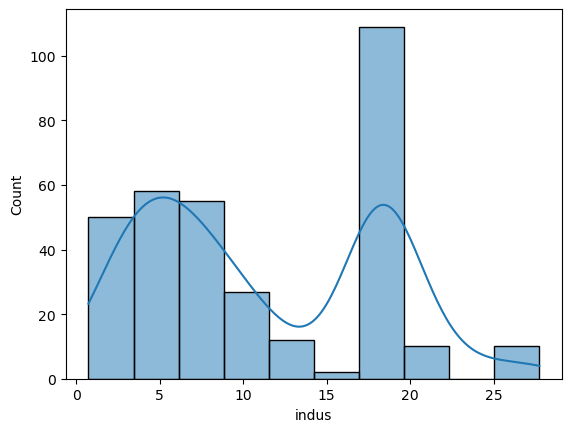

In [7]:
import seaborn as sns
sns.histplot(df.indus,kde=True)

<Axes: >

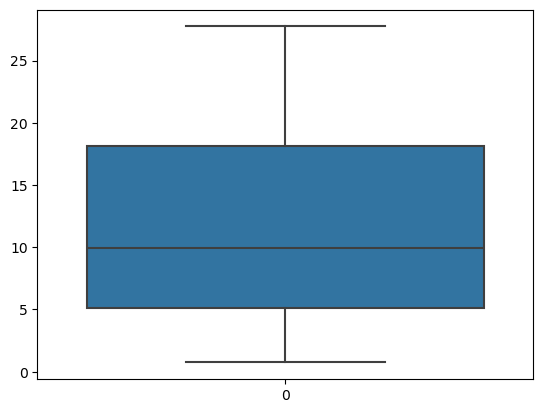

In [8]:
sns.boxplot(df.indus)

In [9]:
correlation=df.corr()
correlation.loc['indus']

ID         0.421978
crim       0.422228
zn        -0.518679
indus      1.000000
chas       0.037496
nox        0.750087
rm        -0.440365
age        0.638378
dis       -0.702327
rad        0.569779
tax        0.708313
ptratio    0.391087
black     -0.335049
lstat      0.614155
medv      -0.473932
Name: indus, dtype: float64

<Axes: >

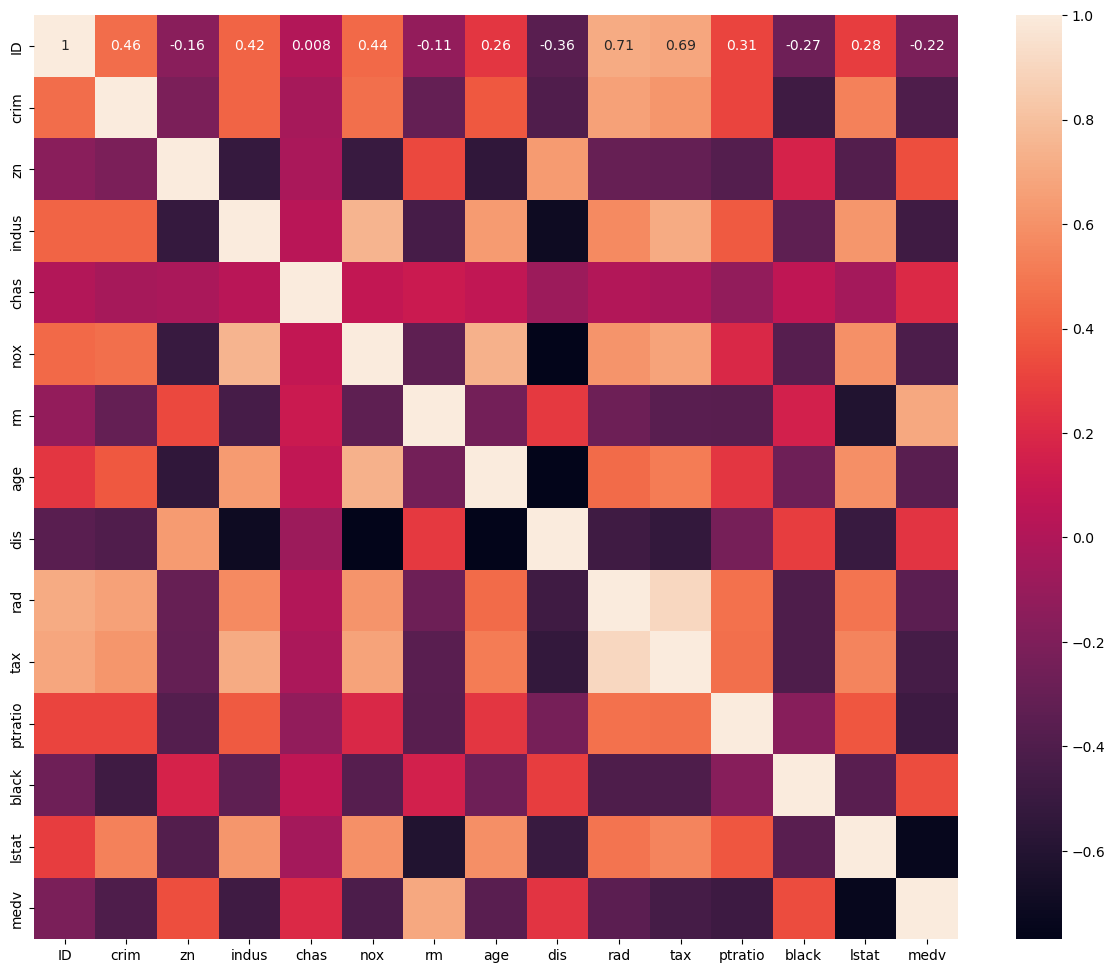

In [10]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

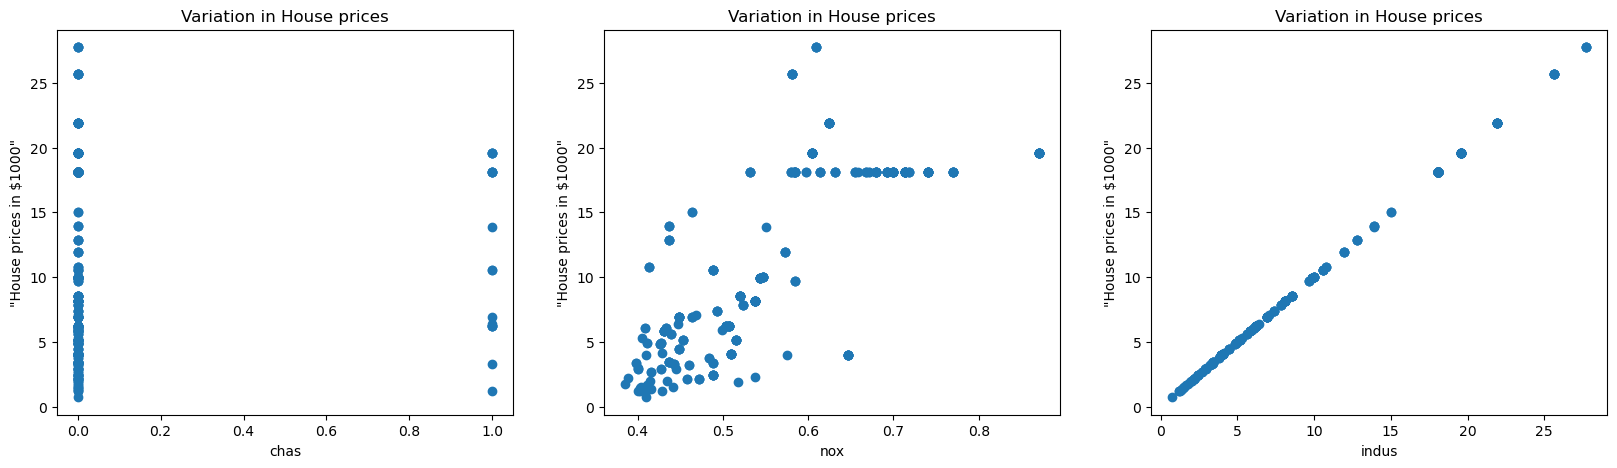

In [11]:
plt.figure(figsize = (20,5))
features = ['chas','nox','indus']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df.indus
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [12]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install tensorflow

In [14]:
X = df.iloc[:,:-1]
y= df.indus

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)


4.7955834640590286e-14


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

1.0


In [25]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
#Creating the neural network model
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(128,activation = 'relu',input_shape=(14,)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

C:\Users\Tejas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 166.5757
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161.2718 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.8524 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.3729 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.2790 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4298 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6089 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8732 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8268 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0460 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7265 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1486 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0757 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7436 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6471 
Epoch 16/1

In [30]:
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9937062686616855


In [32]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

0.5317140659831477
